
# <p style="text-align: center;">Анализ данные сервиса Яндекс Недвижимость</p>

### Цель: 
Необходимо проанализировать данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

### Задачи: 
1. Открыть файл и ознакомится с данными;
2. Выполнить предобработку данных и изучить их;
3. Добавить в таблицу новые столбцы;
4. Провести исследовательский анализ данных:
    4.1 Изучить основные параметры объектов;
    4.2 Изучить как быстро продавались квартиры;
    4.3 Изучить от чего зависит цена;
    4.4 Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах;
    4.5 Выделить квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислить среднюю цену каждого километра. Описать, как стоимость объектов зависит от расстояния до центра города.
5. Написать общий вывод.



# 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t') 
data.head(10) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
print(data.columns)
print(data.info())

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_a

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

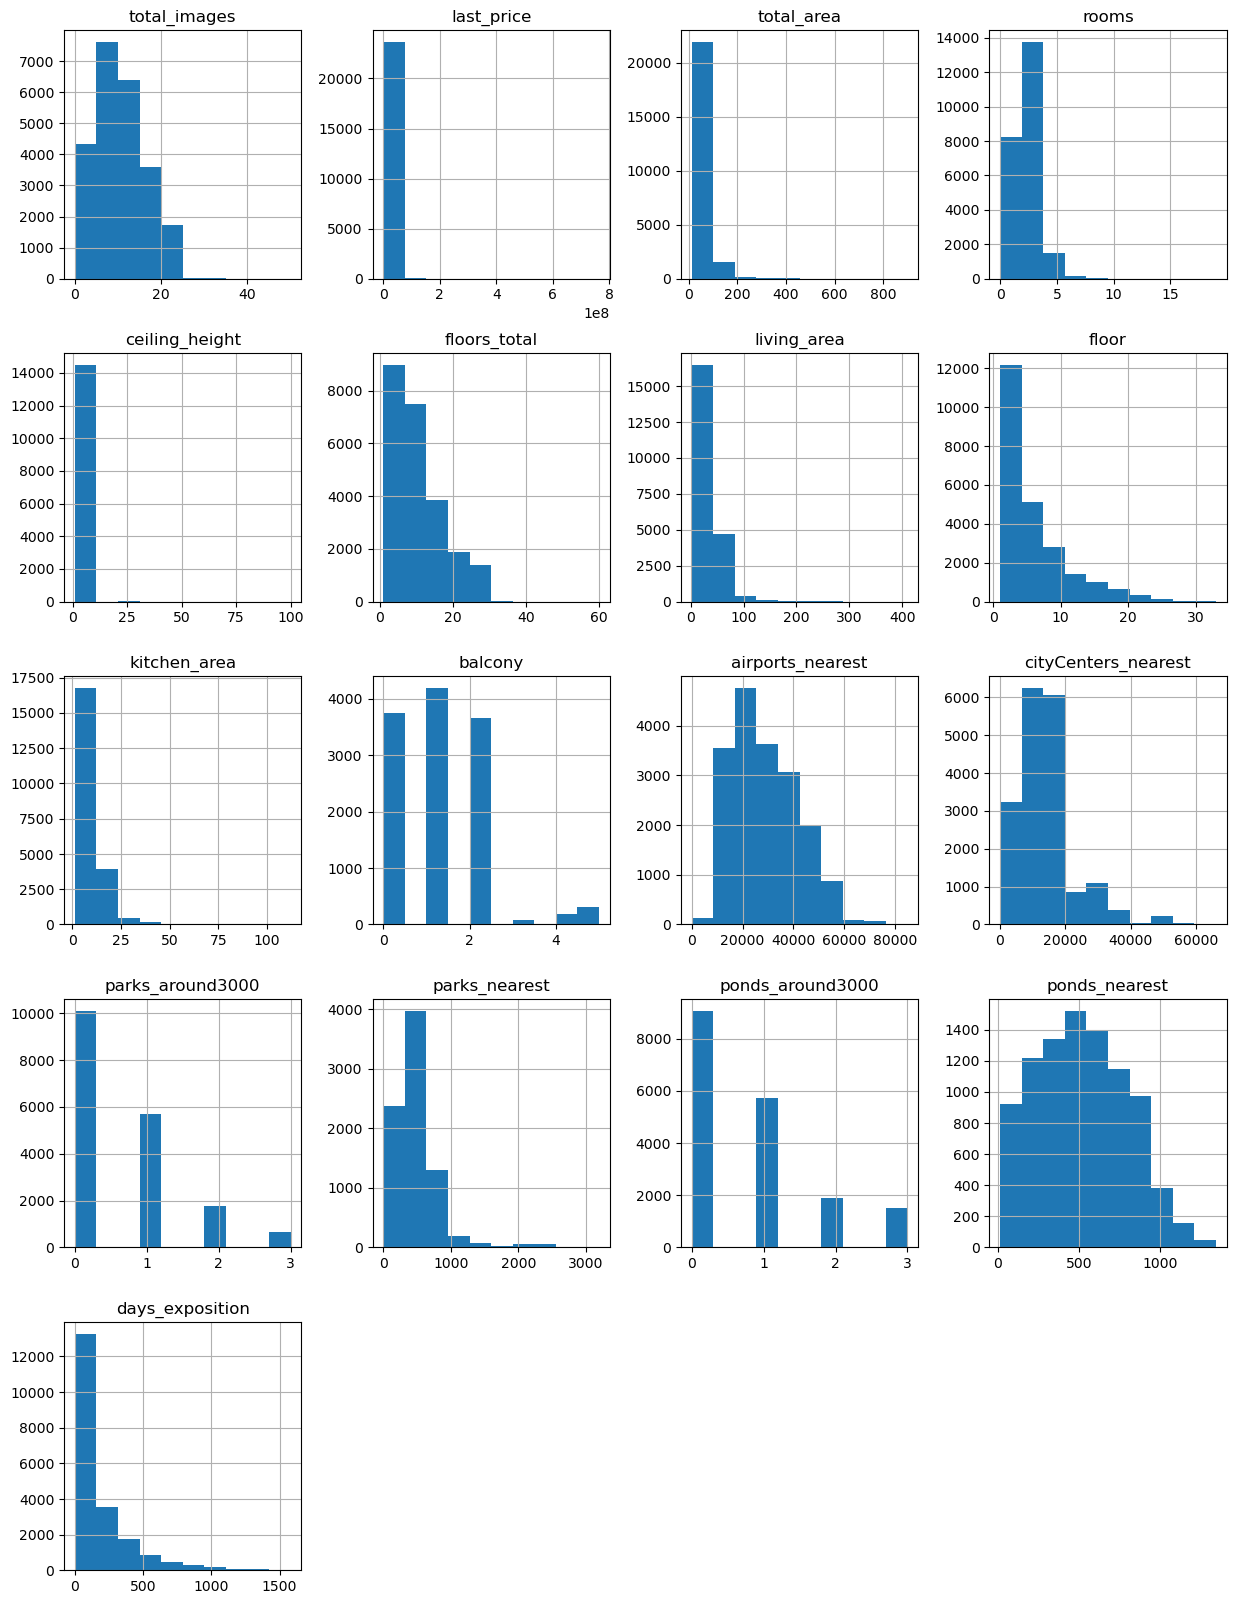

In [3]:
data.hist(figsize=(15, 20))

# Выводы по  1 разделу.
### Датасет достаточно обшиерен состоит из различных 22 столбцов и имеет 23699 значений. При этом в датасете присутвуют пропуски и аномальные значения.
--------

# 2. Предобработка данных

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Переведем название в змеиный язык

In [5]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

В данных явно проблемы например в столбцах: 
ceiling_heigh, is_apartment, living_area, kitchen_area, balcony, airports_nearest,
cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition - пропуски

In [6]:
print(data['is_apartment'].value_counts())
print(len(data[data['is_apartment'].isna()]))

False    2725
True       50
Name: is_apartment, dtype: int64
20924


В столбце апартаменты - 50 значений положительных, а 2725 отрицательных при этом остальные значения отсутствуют значит 
если пользователи не указали, является ли квартира - апартаментами, значит это обычные квартиры в связи с чем заполним 
пропущеные значения на False а затем переведем в булевое значение

In [7]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype('bool')
print(len(data[data['is_apartment'].isna()]))

0


Аналогично, если продавец не указал количество балконов, то их попросту нет. Так как зачастую продавцы стараются для того что-бы повисить конкурентоспособность объявления  они предоставляют полную информацию о квартире. 

In [8]:
print(len(data[data['balcony'].isna()]))
data['balcony'] = data['balcony'].fillna(0)
print(len(data[data['balcony'].isna()]))

11519
0


Аналогично, если продавец не указал близость к парку или к водоёму, можно предположить что они попросту отсутутвуют - рядом.

In [9]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

Найти, недостающие значения названия места - не предоставляется возможным, в связи с чем поменяем значение на 'unknown'.При этом отсутствие данного значение - странно, так как понять покупателю, где находится квартира, не предоставляется возможным.
Можно предположить что адрес скрыт от покупателя или данные кем-то удалены.

In [10]:
data['locality_name'] = data['locality_name'].fillna('unknown')

Изменим не явные дубликаты в столбце с населенными пунктами. уберем заглавные буквы и заменим ё на е

In [11]:
data['locality_name'] = data['locality_name'].str.lower().replace('ё', 'е', regex=True)
data['locality_name'].value_counts().head(10)

санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: locality_name, dtype: int64

Добавим к названиям, имеющим неявные дубликаты название - 'поселок'

In [12]:
def categorize(row):
    if 'мурино' == row:
        return 'поселок мурино'
    elif 'кудрово' == row:
        return 'деревня кудрово'
    else: 
        return row
data['locality_name'] = data['locality_name'].apply(categorize)
print(data['locality_name'].value_counts().head(10))

санкт-петербург      15721
поселок мурино         590
деревня кудрово        472
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
выборг                 237
Name: locality_name, dtype: int64


In [13]:
data_max_price= data['last_price'].sort_values(ascending = False)
print(data_max_price.head(20))

12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
5893     230000000.0
8900     190870000.0
19865    180000000.0
19155    160000000.0
2536     159984000.0
16495    159000000.0
1026     155000000.0
15016    150000000.0
7857     150000000.0
22229    148000000.0
12859    140000000.0
12674    140000000.0
Name: last_price, dtype: float64


Аномальные малые значения - меньше 400 тыс. руб. и аномально большие значения- свыше 100 млн. руб. для сверхбогатых тоже уберем 

In [14]:
data = data.query('last_price > 400000 and last_price < 100000000')

Заменим в столбцах пропущеные значенния. Выделим медианный коэффициент разделив размер площади кухни(жилой площади) на общую площадь. Получившейся результат умножим на общую площадь и вставим в пропущеные значенния. Т.е выделим медианное значение размер жилой площади и площади кухни к общей площади 



In [15]:
mean_proportion_kitchen_area = (data['kitchen_area'] / data['total_area']).median()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*mean_proportion_kitchen_area)



mean_proportion_living_area = (data['living_area'] / data['total_area']).median()
data['living_area'] = data['living_area'].fillna(data['total_area']*mean_proportion_living_area)


Осталось 106 значений это те значения у которых только одно уникальное значение в столбце 'locality_name' если их удалить то на выборку это не повлияет.

Переведём высоту потолков из метров в сантиметры, а затем заменим пропущеные значение на медианное значение, ориентируясь по населенному пункту.

[  270.    nan   303.   250.   267.   256.   305.   275.   260.   290.
   280.   255.   300.   265.   320.   261.   325.   345.   277.   285.
   264.   257.   415.   350.   330.   271.   400.   247.   273.   284.
   310.   234.   340.   306.   272.   254.   251.   278.   276.  2500.
   258.   370.   252.   520.   287.   266.   259.   200.   245.   360.
   292.   311.   313.   380.   315.   355.   316.   362.   312.   253.
   274.   296.   246.   500.   279.   295.   406.   294.   354.   353.
   283.   240.   338.   301.   560.   365.   390.   318.   335.   230.
   357.   248.   262.   282.   398.   263.   383.   352.   395.   375.
   288.   367.   387.   366.   386.   419.   324.   480.   450.   420.
   336.  3200.   308.   368.   307.   337.   309.   800.   326.   334.
   281.   344.   297.   314.   437.   268.   322.   327.  2700.   410.
   293.   346.  2400.   347.   333.   363.   332.  2600.   120.   830.
   298.   286.   317.   440.   328.   304.   445.   550.   384.   323.
   302

<AxesSubplot:>

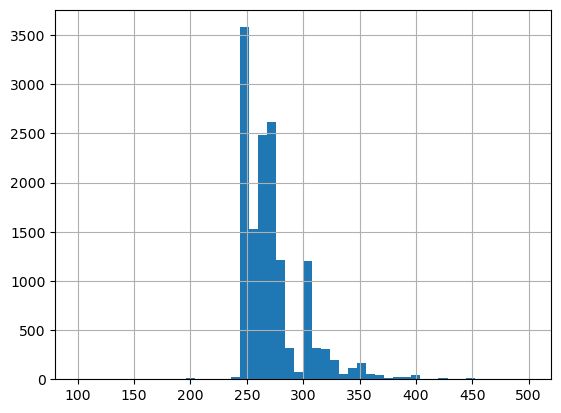

In [16]:

data['ceiling_height'] = data['ceiling_height']*100
print(data['ceiling_height'].unique())
print(data['ceiling_height'].max(),data['ceiling_height'].min())
data['ceiling_height'].hist(bins=50,range = (100,500))

удалим  квартиры с аномальными значениями потолков  больше 400 см.  и меньше 220 см. Сложно предсавить потолки свыше 5 метров  и ниже 2.2 метров

In [17]:
data['ceiling_height'] = data['ceiling_height'].fillna('0')
data['ceiling_height'] = data['ceiling_height'].astype('int64')
data = data.query('ceiling_height == 0 or ceiling_height > 220 & ceiling_height < 400')

Посмотрим пропущеные значения в количествах комнат в столбце 'floors_total'

In [18]:
data['floors_total'].isna().sum()

86

Всего 86 пропущеных значений, которые мы не можем заполнить.Так как определить этажность без доп данных невозможно их можно просто удалить. 

Так же в данных, этажность слишком завышена, например в Москве этажность выше 50 сильная редкость, следовательно оставим значения меньше 35 этажей.

In [19]:
data = data.query('floors_total <= 35')

Так же следует убрать квартиры с аномальными значениями больше 200 кв.м. так как по моему мнению свыше 200 кв.м. это сверх богатое жильё. 

In [20]:
data = data.query('total_area <= 200')         

У нас нет данных на которые можно заменить пустые значения в столбцах: airports_nearest, city_centers_nearest, parks_nearest, ponds_nearest. Так же у нас нету столбцов на которые можно сослаться для их заполнения.

Сложно определить почему в столбце days_exposition отсутствуют значения, можно предположить, что эти квартиры во время среза базы данных, были опубликованы и не сняты с сайта. Следовательно, не стоит их выбрасывать из датасета.
_________

После заполнения пустых значений, можно изменить тип данных в столбцах.

Например, количество балконов не может быть дробным, к таким данным так же можно отнести столбцы - высота потолков, кол-во комнат, цены на квартиры, кол-во парков и водоемов рядом.

In [21]:
data['balcony'] = data['balcony'].astype('int64')
data['floors_total'] = data['floors_total'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
data['last_price'] = data['last_price'].astype('int64')

In [22]:
print(data.isna().sum())
print(data.info())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5497
city_centers_nearest     5477
parks_around3000            0
parks_nearest           15430
ponds_around3000            0
ponds_nearest           14429
days_exposition          3089
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23267 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23267 non-null  int64  
 1   last_price            23267 non-null  int64  
 2   total_are

# Выводы по 2 разделу
### Данные очищенны, убраны пустые значение  и  неявные дубликаты где это возможно. Столбцы перемеинованы и приведены к нужному типу данных. Удаленно менее 5 % данных.

# 3. Посчитайте и добавьте в таблицу новые столбцы

Добавим столбец - с ценой за один квадратный метр.

In [23]:
data['price_one_square_metre'] = data['last_price']/data['total_area'] 
data['price_one_square_metre'] = data['price_one_square_metre'].astype('int64')
data['price_one_square_metre'].head(10)

0    120370
1     82920
2     92785
3    408176
4    100000
5     95065
6     99195
7    110544
8     87454
9     88524
Name: price_one_square_metre, dtype: int64

Добавим столбец - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).

In [24]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['day_of_week_exposition'] = data['first_day_exposition'].dt.weekday
print(data['day_of_week_exposition'].head(10))

0    3
1    1
2    3
3    4
4    1
5    0
6    3
7    3
8    2
9    6
Name: day_of_week_exposition, dtype: int64


Добавим столбец с месяцем публикации объявления.

In [25]:
data['month_exposition'] = data['first_day_exposition'].dt.month
print(data['month_exposition'].head(10))

0     3
1    12
2     8
3     7
4     6
5     9
6    11
7     4
8     5
9     2
Name: month_exposition, dtype: int64


Добавим столбец с годом публикации объявления.

In [26]:
data['year_exposition'] = data['first_day_exposition'].dt.year
print(data['year_exposition'].head())

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_exposition, dtype: int64


Добавим колонку тип этажа квартиры (значения — «первый», «последний», «другой»).

In [27]:
def type_floor(row):
    if row['floor'] == row['floors_total']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
    
data['type_floor'] = data.apply(type_floor, axis=1)
print(data['type_floor'].head())

0    другой
1    первый
2    другой
3    другой
4    другой
Name: type_floor, dtype: object


Расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)

In [28]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000,0)

In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23267 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23267 non-null  int64         
 1   last_price               23267 non-null  int64         
 2   total_area               23267 non-null  float64       
 3   first_day_exposition     23267 non-null  datetime64[ns]
 4   rooms                    23267 non-null  int64         
 5   ceiling_height           23267 non-null  int64         
 6   floors_total             23267 non-null  int64         
 7   living_area              23267 non-null  float64       
 8   floor                    23267 non-null  int64         
 9   is_apartment             23267 non-null  bool          
 10  studio                   23267 non-null  bool          
 11  open_plan                23267 non-null  bool          
 12  kitchen_area             23267 n

# Выводы по  3 разделу

### Мы добавили, вспомогательные столбцы, необходимые для будущего анализа,  а именно: 
- расстояние до центра города в километрах;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- год публикации объявления;
- месяц публикации объявления;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- столбец с ценой за один квадратный метр.


# 4.1 Проведите исследовательский анализ данных

count    23267.000000
mean        10.252893
std          5.283548
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         93.200000
Name: kitchen_area, dtype: float64


<AxesSubplot:title={'center':'площадь кухни'}, ylabel='Frequency'>

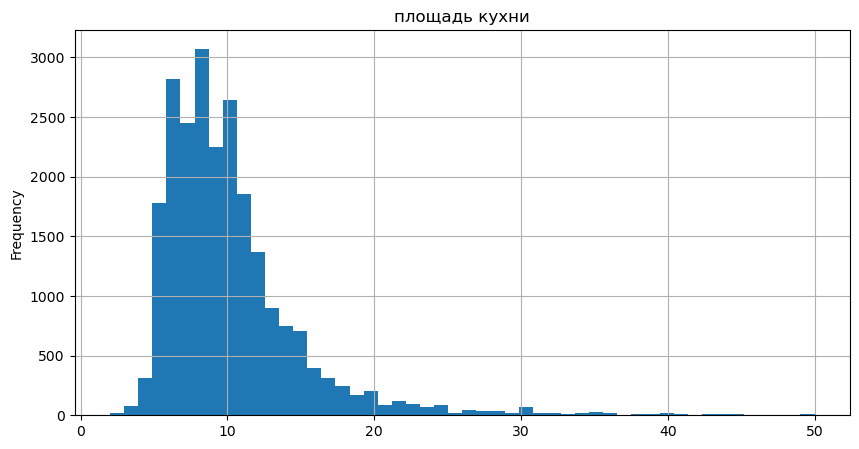

In [30]:
print(data['kitchen_area'].describe())
data['kitchen_area'].plot(kind='hist', title='площадь кухни', y='kitchen_area', bins=50, grid=True, figsize=(10,5), range=(2, 50))

<AxesSubplot:title={'center':'площадь кухни'}, ylabel='Frequency'>

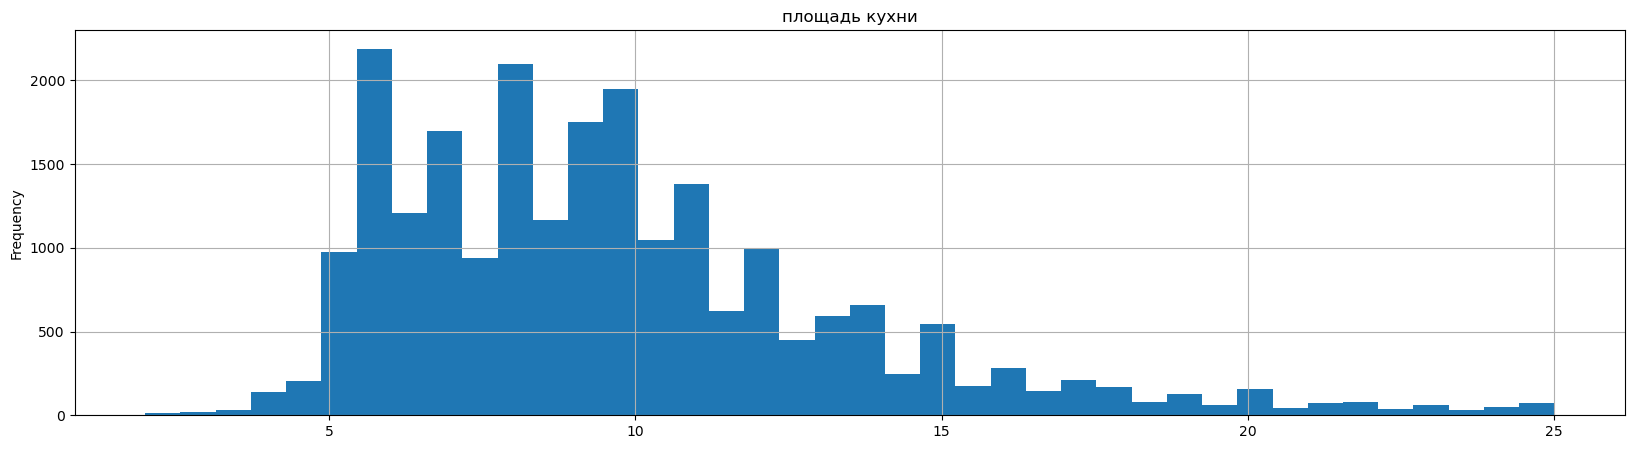

In [31]:
data['kitchen_area'].plot(kind='hist', title='площадь кухни', y='kitchen_area', bins=40, grid=True, figsize=(20,5), range=(2, 25))

Судя по графику,  значенияблизки к распределению Пуассона, имеются пики на значениях 6, 8 и 10 кв.м. Так же имеются выбросы на значениях с 40 по 50 кв.м.

count    23267.000000
mean        33.239777
std         17.221567
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


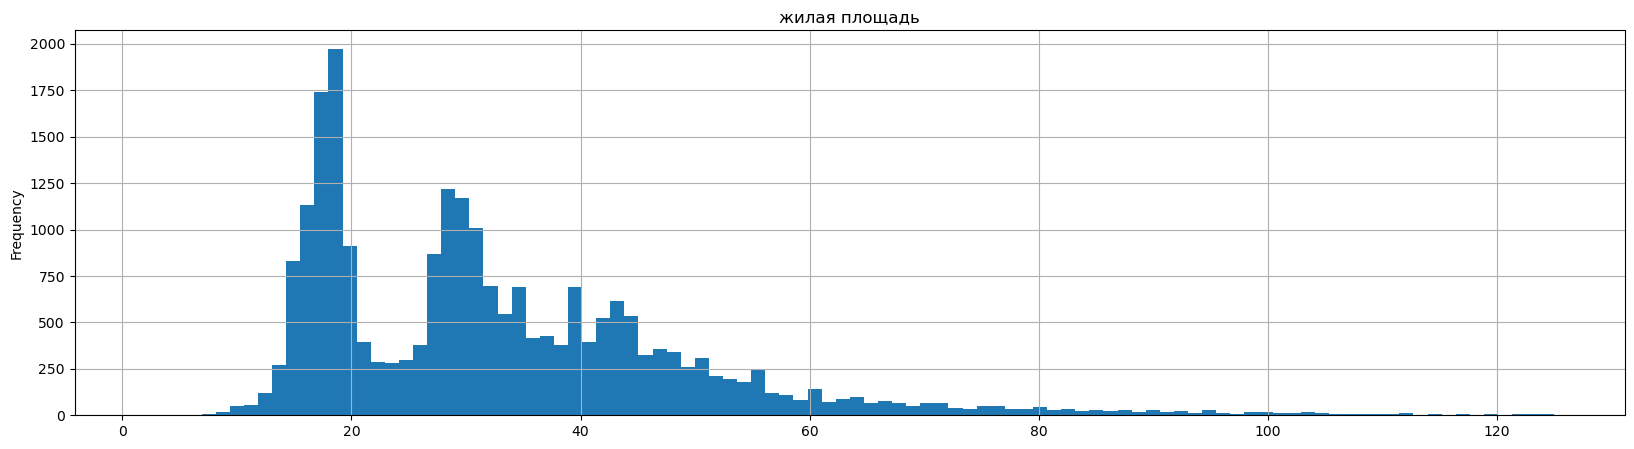

In [32]:
print(data['living_area'].describe())
print(data['living_area'].plot(kind='hist', title='жилая площадь', y='living_area', bins=100, grid=True, figsize=(20,5), range=(2, 125)))

AxesSubplot(0.125,0.11;0.775x0.77)


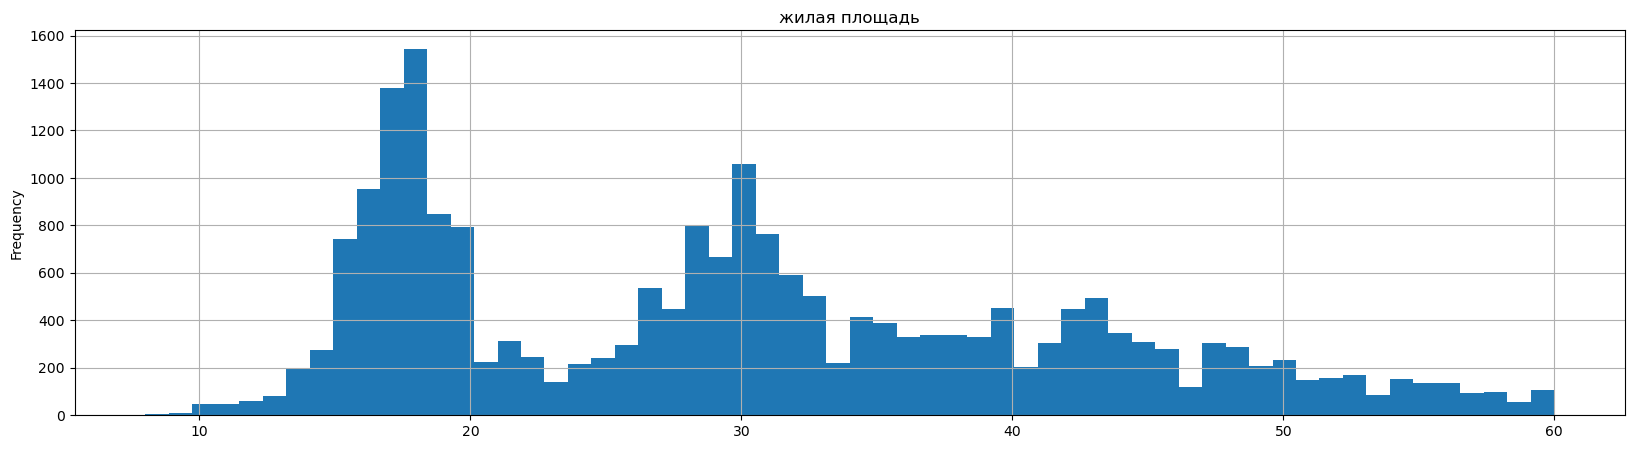

In [33]:
print(data['living_area'].plot(kind='hist', title='жилая площадь', y='living_area', bins=60, grid=True, figsize=(20,5), range=(8, 60)))

Основная масса значений, сосредоточена с 10 по 60 кв. м. Значений больше 80 крайне мало. Наибольшие пики наблюдаются на 17 и 30 кв. м. При этом имеется пропасть между значениями 20 и 28 кв. м.

count    23267.000000
mean        58.082431
std         26.410755
min         12.000000
25%         40.000000
50%         51.700000
75%         68.700000
max        200.000000
Name: total_area, dtype: float64
AxesSubplot(0.125,0.11;0.775x0.77)


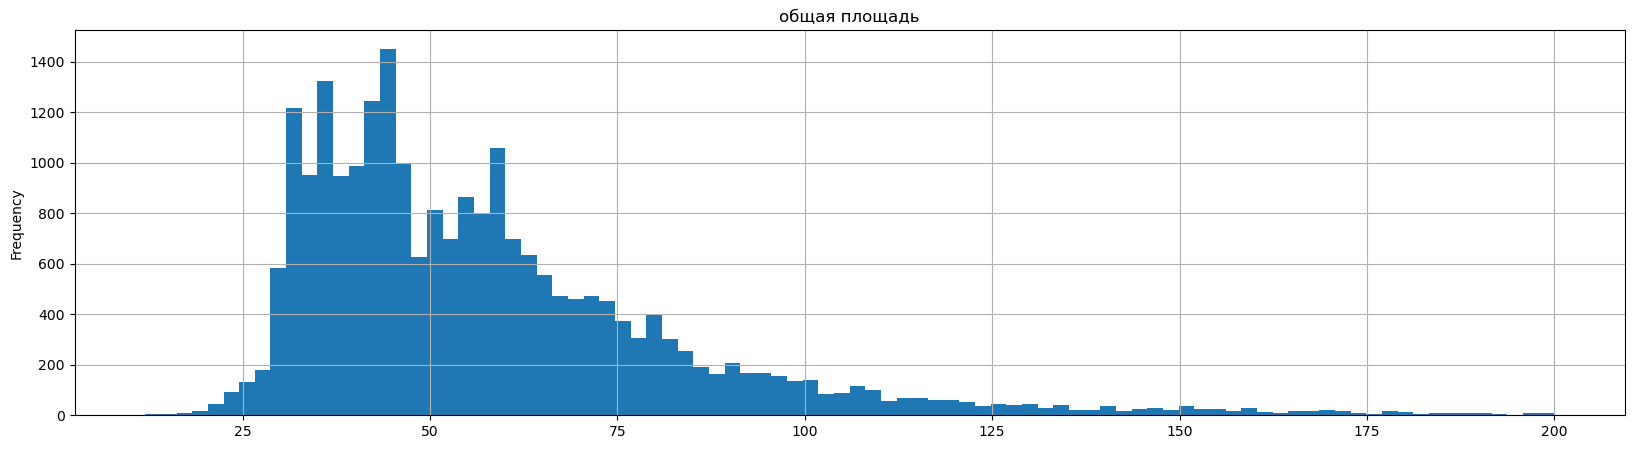

In [34]:
print(data['total_area'].describe())
print(data['total_area'].plot(kind='hist', title='общая площадь', y='total_area', bins=90, grid=True, figsize=(20,5), range=(12, 200)))

AxesSubplot(0.125,0.11;0.775x0.77)


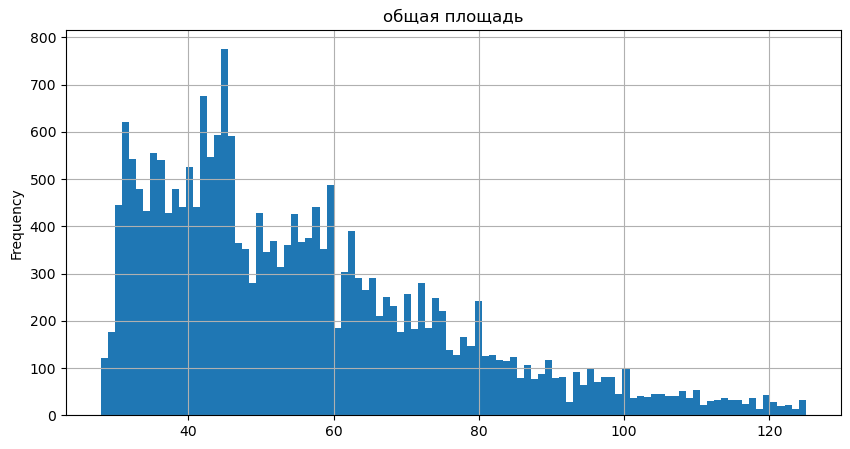

In [35]:
print(data['total_area'].plot(kind='hist', title='общая площадь', y='total_area', bins=100, grid=True, figsize=(10,5), range=(28, 125)))

Гистаграмма приближена к распределению Пуассона. Имеют наибольшее значения с 30 по 60 кв. м. Пики наблюдаются в значениях 30, 42 и 60 кв. м.

98000000 430000
AxesSubplot(0.125,0.11;0.775x0.77)


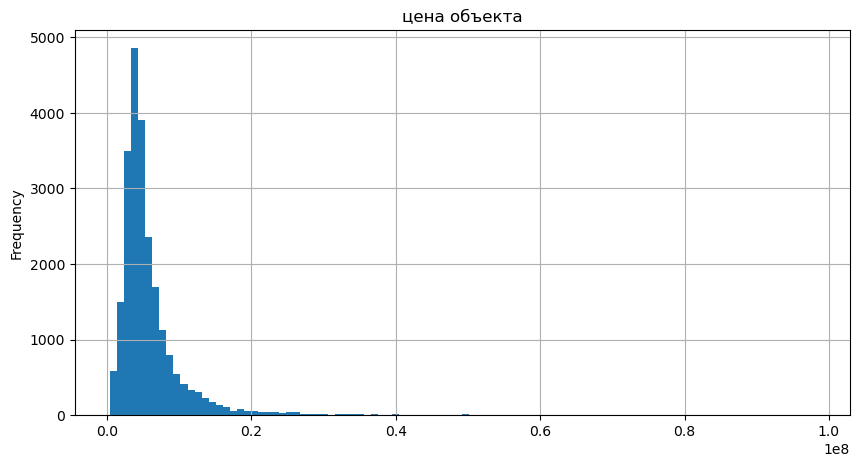

In [36]:
print(data['last_price'].max(),data['last_price'].min())
print(data['last_price'].plot(kind='hist', title='цена объекта', y='last_price', bins=100, grid=True, figsize=(10,5), range=(430000, 98000000)))

AxesSubplot(0.125,0.11;0.775x0.77)


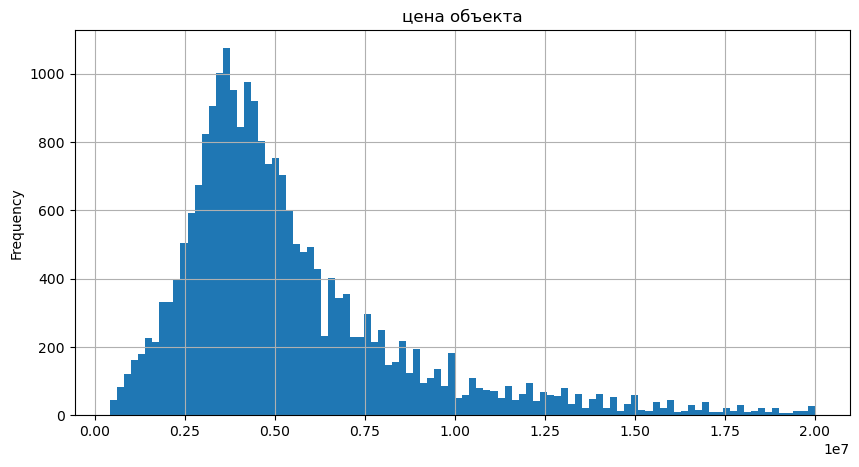

In [37]:
print(data['last_price'].plot(kind='hist', title='цена объекта', y='last_price', bins=100, grid=True, figsize=(10,5), range=(430000, 20000000)))

Столбец - цена объекта, имеет распределение Пуассона с одним пиком 3.5 млн руб. А так же имеются аномальные редкие значения цен свыше 40 млн руб.

11 0
AxesSubplot(0.125,0.11;0.775x0.77)


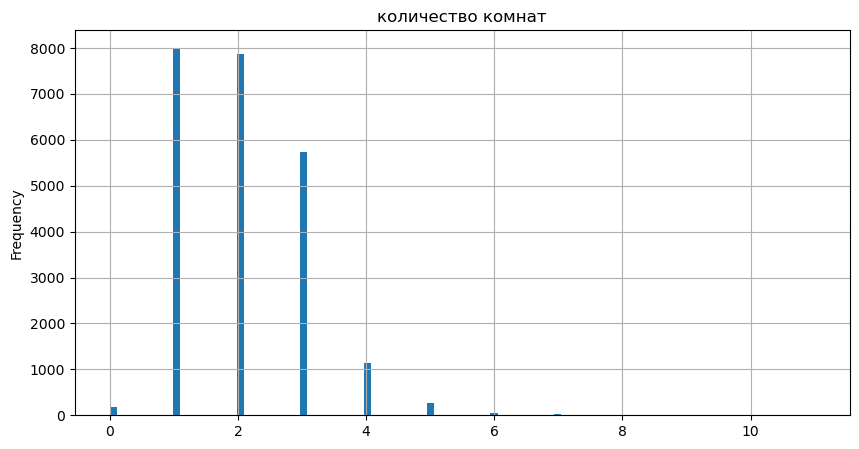

In [38]:
print(data['rooms'].max(),data['rooms'].min())
print(data['rooms'].plot(kind='hist', title='количество комнат', y='rooms', bins=100, grid=True, figsize=(10,5), range=(0, 11)))

В столбце наблюдается страность - квартиры с нулем комнат. Скорее всего они относятся к квартирам со свободной планировкой. Распределение очевидно, наибольшее кол-во - это однокомнатные, двухкомнтаные и трехкомнатные квартиры, и небольшое количество четырехкомнатных квартир. Пятикомантные и квартиры с большим количеством комнат, достаточно редкие, но из общей картины выбивается значения с 8 и более комнат.

398 0
AxesSubplot(0.125,0.11;0.775x0.77)


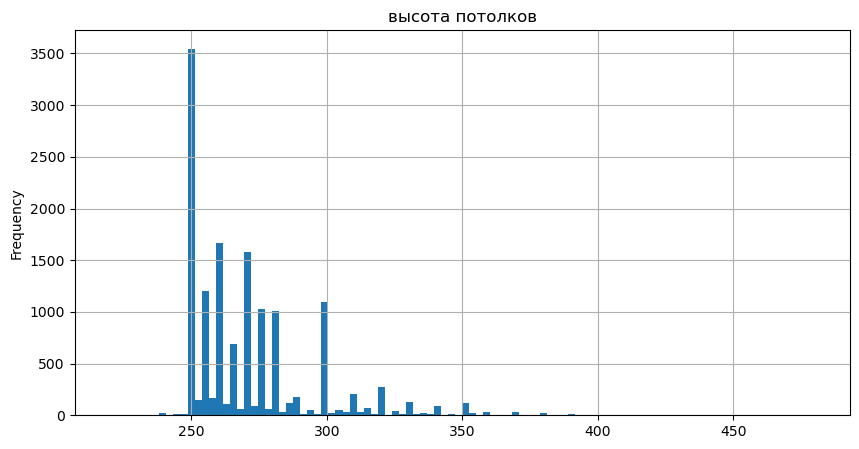

In [39]:
print(data['ceiling_height'].max(),data['ceiling_height'].min())
print(data['ceiling_height'].plot(kind='hist', title='высота потолков', y='ceiling_height', bins=100, grid=True, figsize=(10,5), range=(220, 480)))

AxesSubplot(0.125,0.11;0.775x0.77)


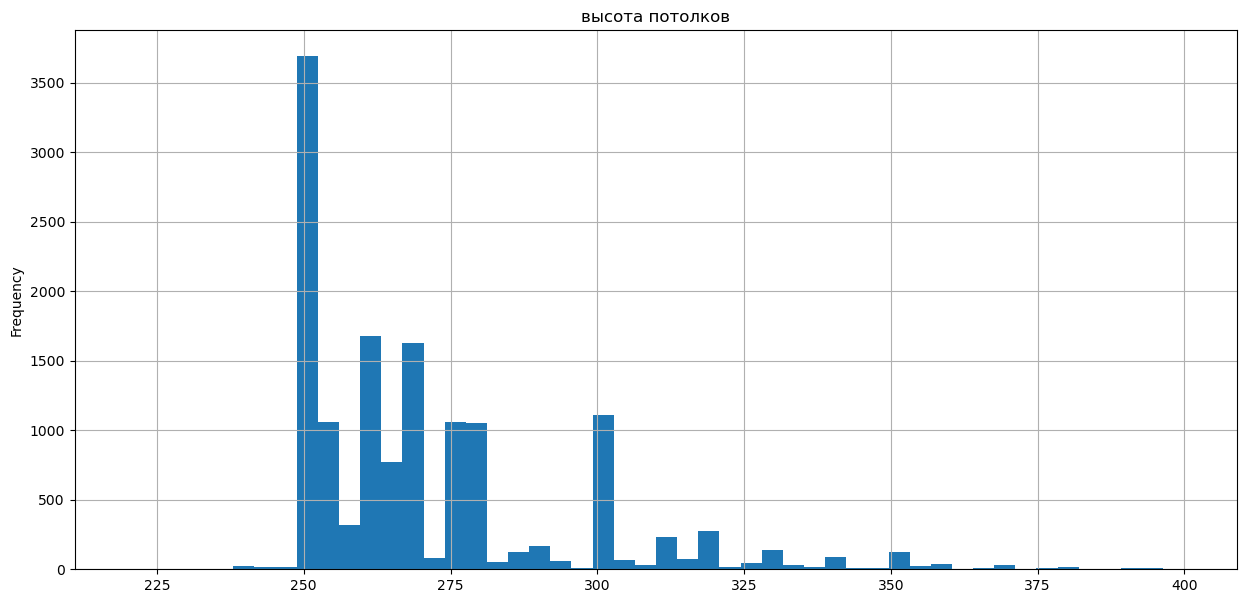

In [40]:
print(data['ceiling_height'].plot(kind='hist', title='высота потолков', y='ceiling_height', bins=50, grid=True, figsize=(15,7), range=(220, 400)))

В столбце высота потолков есть пиковые значения 250 см. Еще есть несколько меньших пиковых значений 256, 259, 265, 275 и 300 см.

AxesSubplot(0.125,0.11;0.775x0.77)
другой       17150
последний     3256
первый        2861
Name: type_floor, dtype: int64


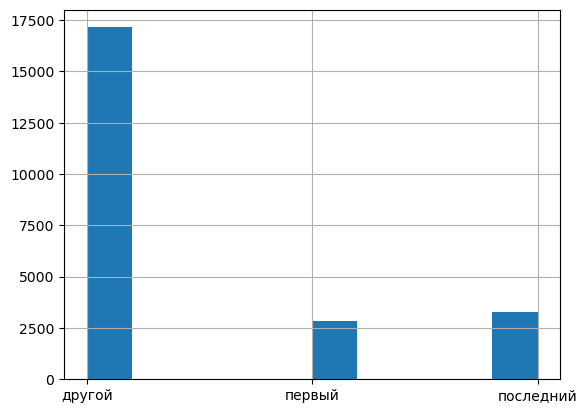

In [41]:
print(data['type_floor'].hist())
print(data['type_floor'].value_counts())

Как и ожидалось, у квартир у которых этаж не на первом или последнем этаже - больше всего, но при этом в датасете достаточно много квартир на первых и последних этажах.

33 1
AxesSubplot(0.125,0.11;0.775x0.77)


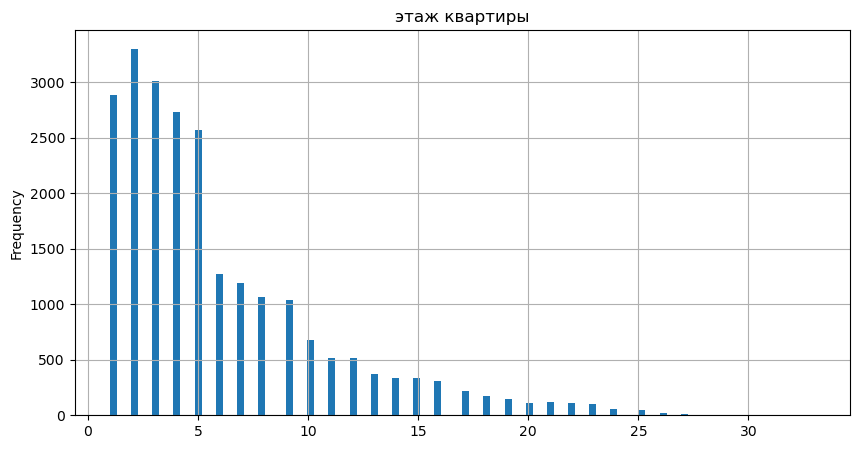

In [42]:
print(data['floor'].max(),data['floor'].min())
print(data['floor'].plot(kind='hist', title='этаж квартиры', y='last_price', bins=100, grid=True, figsize=(10,5), range=(1, 33)))

Можно сделать промежуточный вывод - что больше всего квартир, сдают в пятиэтажных домах, наибольшие значения с 1 по 5 этаж. На втором месте, девятиэтажные дома - второй пик с 6 по 9 этаж. За ними идут 16 этажные дома и самые редкие с 17 по 25 этажами. Стоит заметить, что на последних этажах на 5, 9 и 16 меньше значений, так как это последние этажи.

35 1
AxesSubplot(0.125,0.11;0.775x0.77)


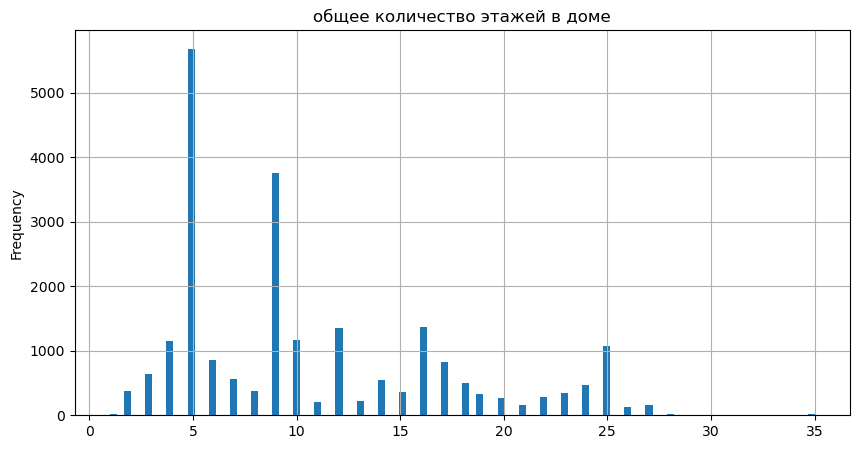

In [43]:
print(data['floors_total'].max(),data['floors_total'].min())
print(data['floors_total'].plot(kind='hist', title='общее количество этажей в доме', y='floors_total', bins=100, grid=True, figsize=(10,5), range=(1, 35)))    

Как и ожидалось, из предыдущего промежуточного вывода, самые распростареные квартиры на продажу это - 5, 9. Следом идут 12 и 16 и последний пик на 25 этажных дома 

AxesSubplot(0.125,0.11;0.775x0.77)


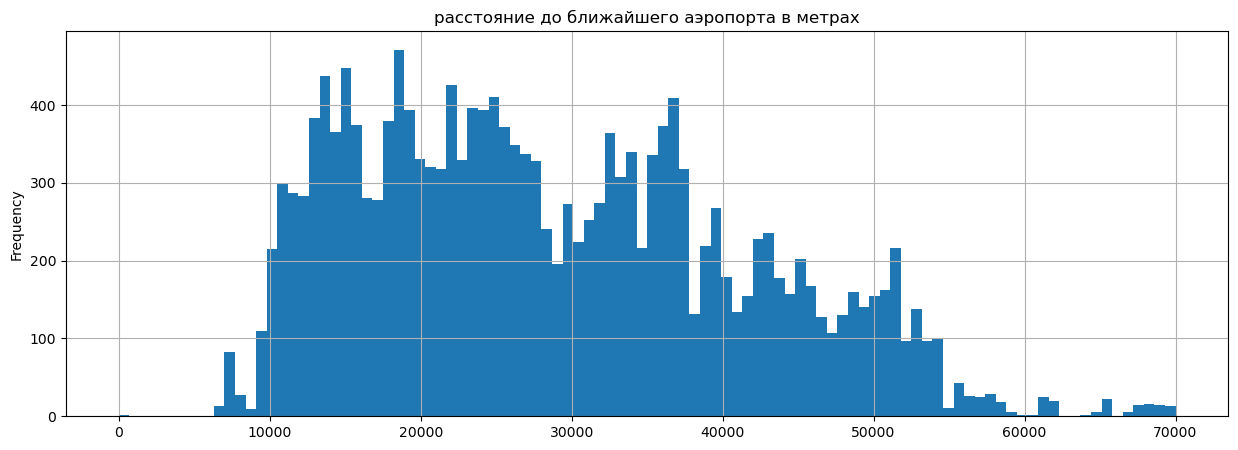

In [44]:
print(data['airports_nearest'].plot(kind='hist', title='расстояние до ближайшего аэропорта в метрах', y='airports_nearest', bins=100, grid=True, figsize=(15,5), range=(0, 70000)))

Основной массив данных в столбце - находится в пределах значений от 10 до 50 км. Столбец приближен к распределению Пуассона но имеет пики на значениях - 13, 15, 17, 22, 36 км

AxesSubplot(0.125,0.11;0.775x0.77)


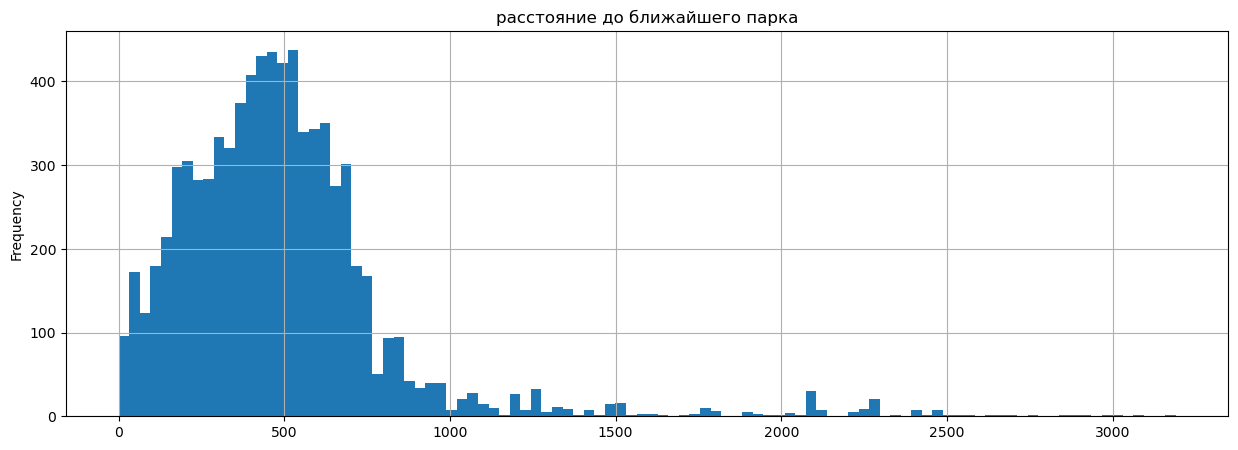

In [45]:
print(data['parks_nearest'].plot(kind='hist', title='расстояние до ближайшего парка', y='parks_nearest', bins=100, grid=True, figsize=(15,5), range=(0, 3190)))

AxesSubplot(0.125,0.11;0.775x0.77)


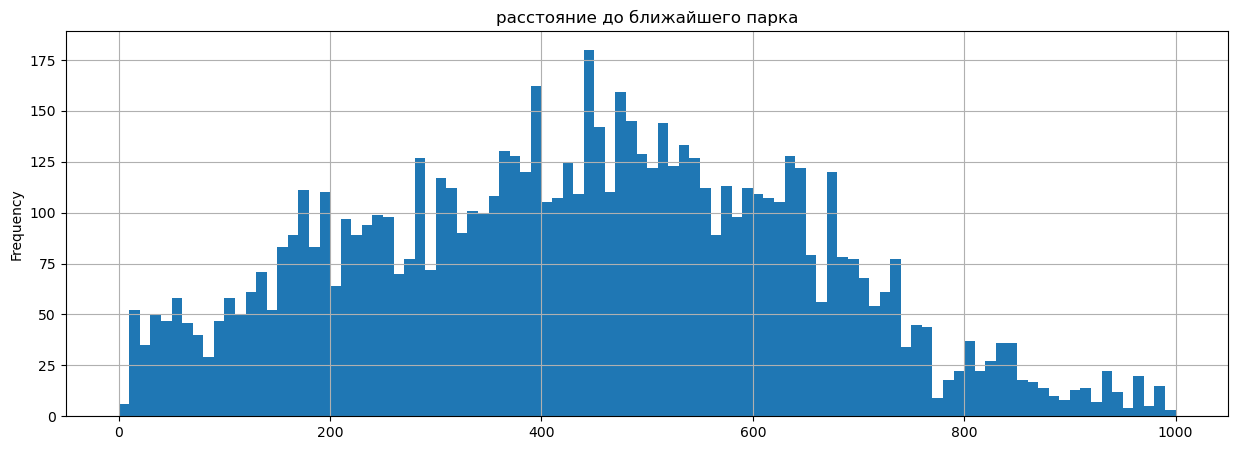

In [46]:
print(data['parks_nearest'].plot(kind='hist', title='расстояние до ближайшего парка', y='parks_nearest', bins=100, grid=True, figsize=(15,5), range=(0, 1000)))

В столбце сушествует значительный выброс в значениях свыше 1 км. При этом столбец приближен к распределению Пуассона с пиками значений 450 метров.

AxesSubplot(0.125,0.11;0.775x0.77)


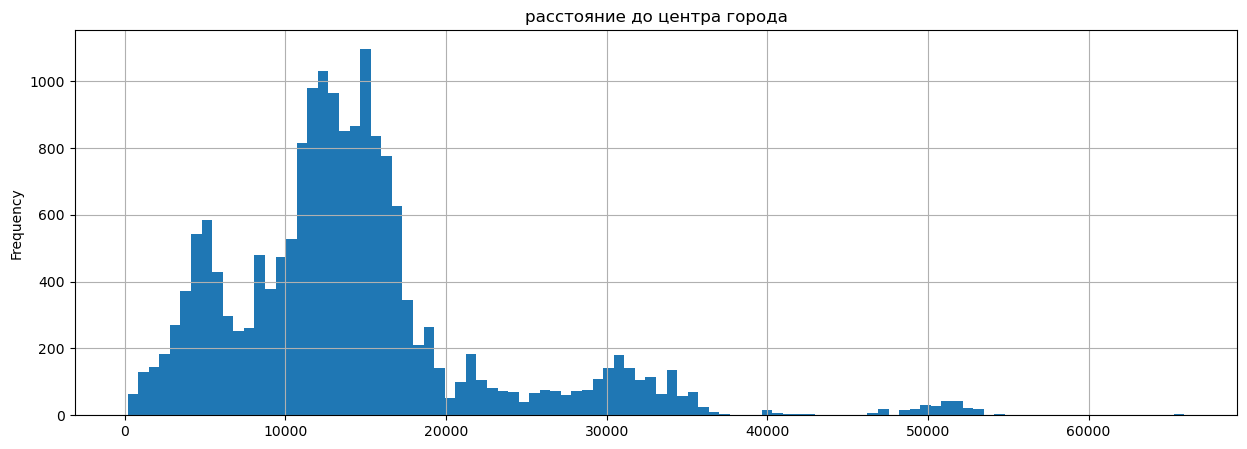

In [47]:
print(data['city_centers_nearest'].plot(kind='hist', title='расстояние до центра города', y='city_centers_nearest', bins=100, grid=True, figsize=(15,5), range=(181, 65968)))

AxesSubplot(0.125,0.11;0.775x0.77)


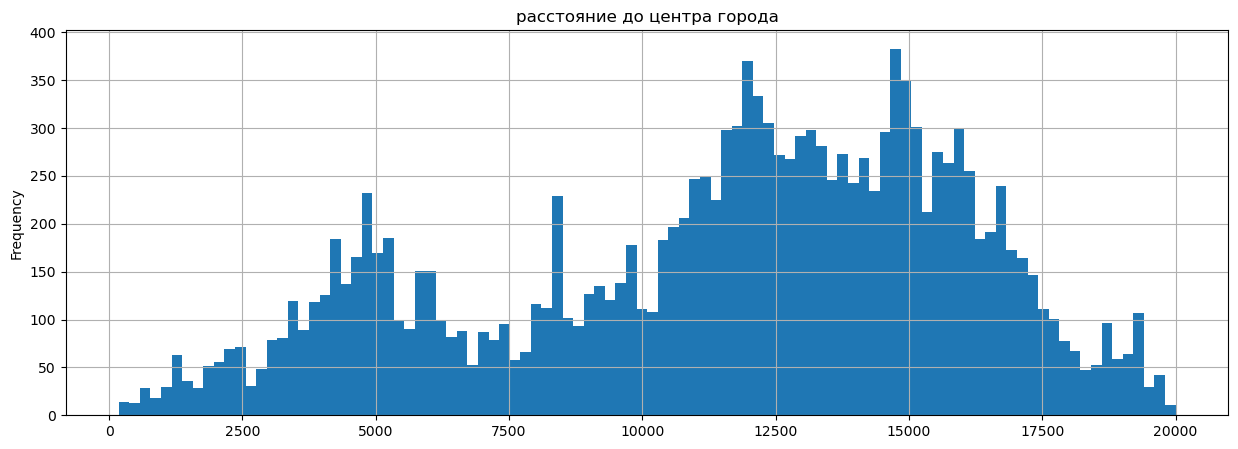

In [48]:
print(data['city_centers_nearest'].plot(kind='hist', title='расстояние до центра города', y='city_centers_nearest', bins=100, grid=True, figsize=(15,5), range=(181, 20000)))

Данные столбца имеет неоднородность - пик на 5 км это кваритры находяшиеся рядом с центром. осноыной массив находится в значениях с 12 км по 15 км - это квартиры находящиеся на окраине города. пик на значениях 21, 31 и 50 км. относятся к городам спутникам.

AxesSubplot(0.125,0.11;0.775x0.77)


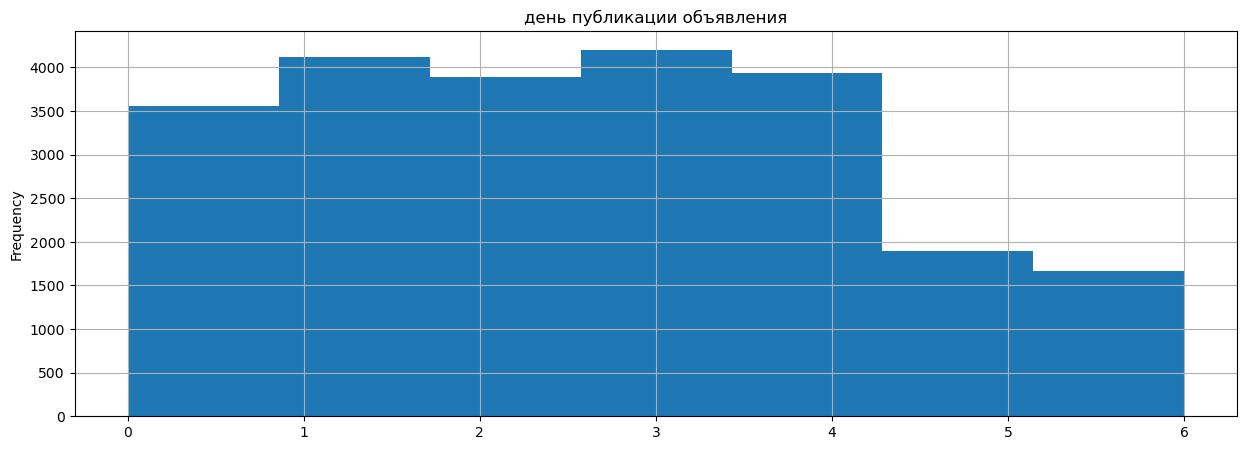

In [49]:
print(data['day_of_week_exposition'].plot(kind='hist', title='день публикации объявления', y='day_of_week_exposition', bins=7, grid=True, figsize=(15,5), range=(0, 6)))

Здесь показатели достаточно очевидные, в выходные люде меньше публикуют страницы о продаже квартир, хотя во вторник и четверг есть небольшое повышение значений.

AxesSubplot(0.125,0.11;0.775x0.77)


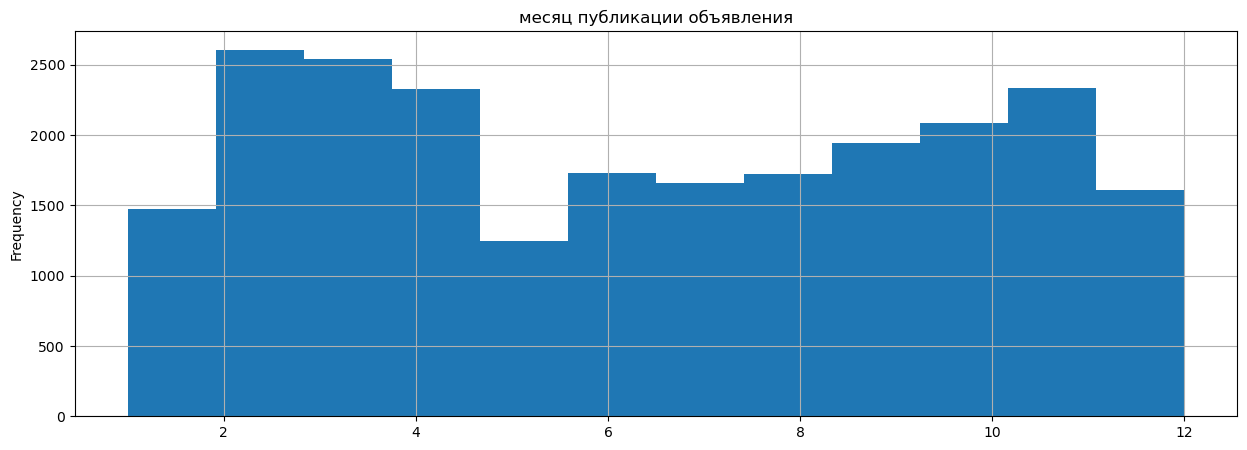

In [50]:
print(data['month_exposition'].plot(kind='hist', title='месяц публикации объявления', y='month_exposition', bins=12, grid=True, figsize=(15,5), range=(1, 12)))

Столбец 'месяц публикации' так же имеет очевидную закономерность в декабре до нового года и в январе когда люди отходят от нового года данных о продаже меньше. И так же очевидно что с мая по август люди чаще уходят в отпуска что подтверждает меньше значений в период с 5 по 8 месяц.

# 4.2. Изучить, как быстро продавались квартиры

AxesSubplot(0.125,0.11;0.775x0.77)
count    20178.000000
mean       179.612449
std        218.293199
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64


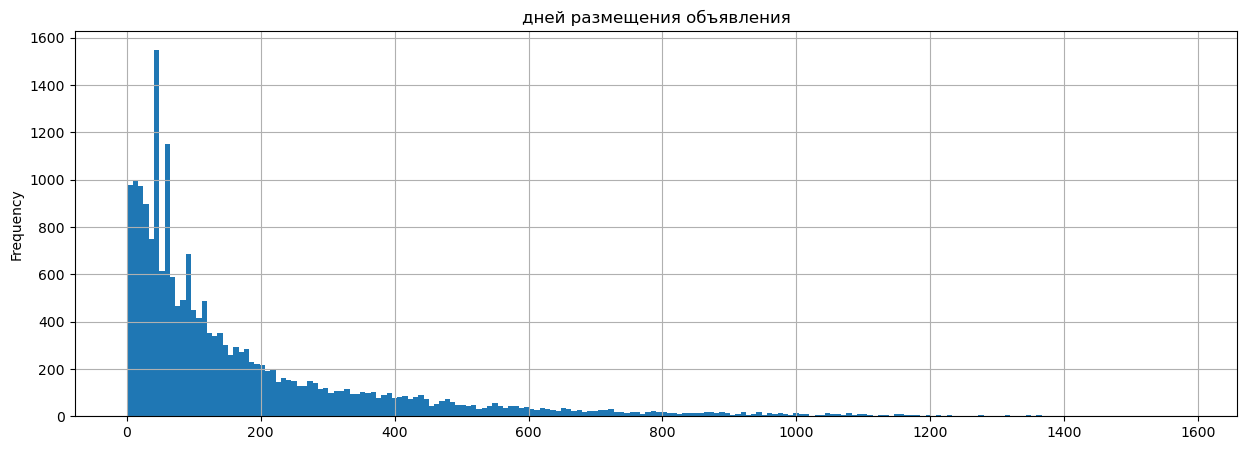

In [51]:
print(data['days_exposition'].plot(kind='hist', title='дней размещения объявления', y='month_exposition', bins=200, grid=True, figsize=(15,5), range=(1, 1580)))
print(data['days_exposition'].describe())

AxesSubplot(0.125,0.11;0.775x0.77)


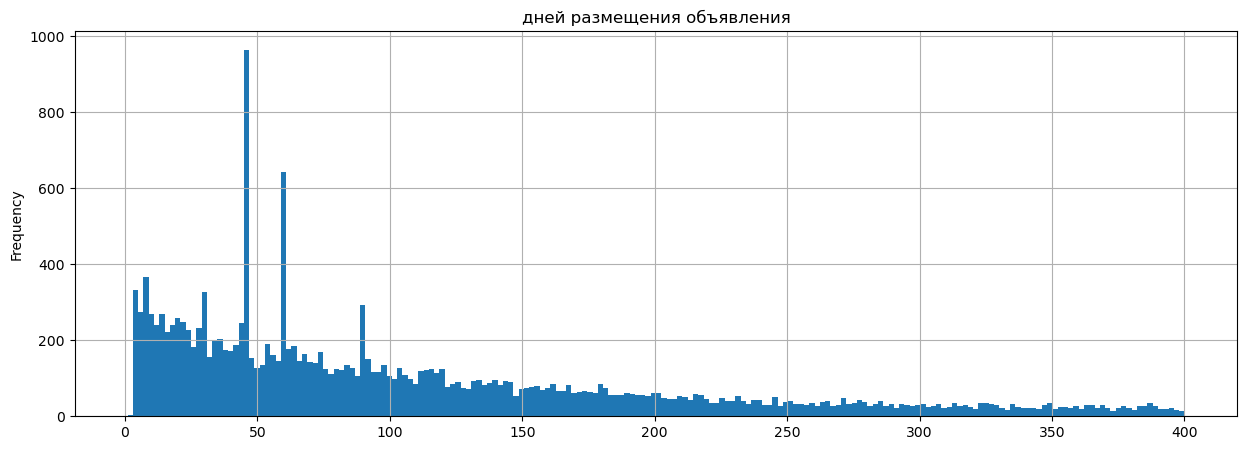

In [52]:
print(data['days_exposition'].plot(kind='hist', title='дней размещения объявления', y='month_exposition', bins=200, grid=True, figsize=(15,5), range=(1, 400)))

В среднем картиры продавались за 179 дней это почти 6 месяцев т.е. за полгода. При этом половина квартир продалась меньше чем за 95 дней . самые быстрые квартиры продавались в среднем за 45 дней. В среднем самыми долгими продажами - являются квартиры которые продавались больше 230 дней. Т.е стоит расчитывать что квартира продастся от 45 до 230 дней.

# 4.3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

День публикации: -0.011892762500775762
Месяц публикации: 0.0055227674924028585
Год публикации: -0.04855319629435602
2019-05-03 00:00:00 2014-11-27 00:00:00


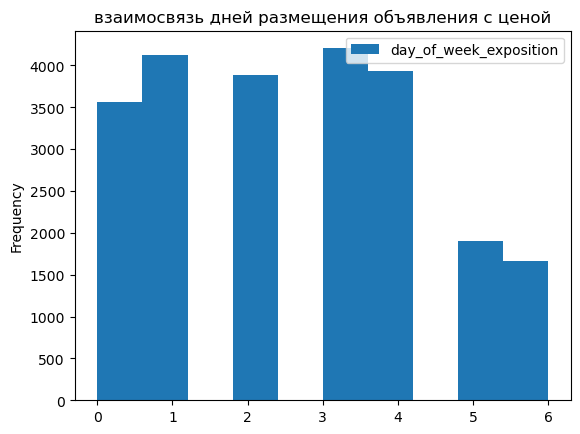

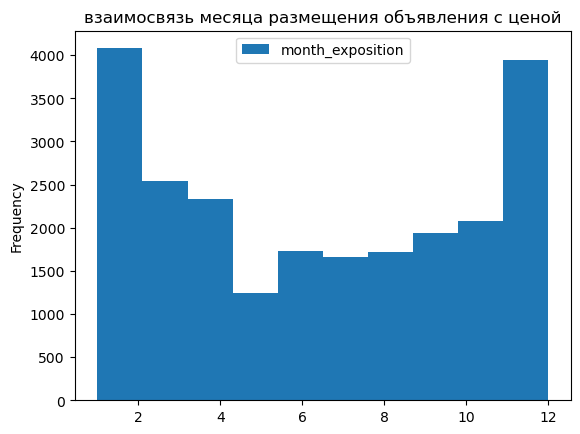

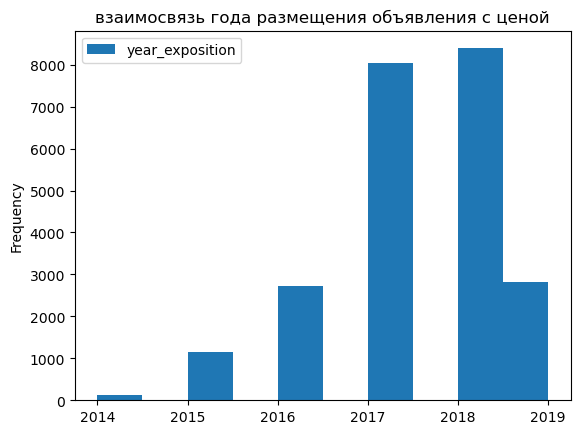

In [53]:
print('День публикации:', data['day_of_week_exposition'].corr(data['last_price']))
print('Месяц публикации:',data['month_exposition'].corr(data['last_price']))
print('Год публикации:',data['year_exposition'].corr(data['last_price']))
data.plot(x='last_price', y='day_of_week_exposition', kind='hist',title='взаимосвязь дней размещения объявления с ценой', range=(0, 6))
data.plot(x='last_price', y='month_exposition', kind='hist',title='взаимосвязь месяца размещения объявления с ценой', range=(1, 12))
data.plot(x='last_price', y='year_exposition', kind='hist',title='взаимосвязь года размещения объявления с ценой')

print(data['first_day_exposition'].max(),data['first_day_exposition'].min())

В выходные размещают более дешевые квартиры. В мае размещали объявления с меньшей ценой, при этом в новогодние праздники цена публикуемых квартир увеличилась почти в 2 раза. с 2014 по 2018 идет рост цен это можно обяснить не только инфляцией но и повышение популярности сервиса. 2014 И 2019 выбиваются из значений так как взят срез в 2014 примерно за один месяц а в 2019 году обявления за 5 месяцов.

<AxesSubplot:title={'center':'Зависимость средней цены от типа этажа'}, xlabel='type_floor'>

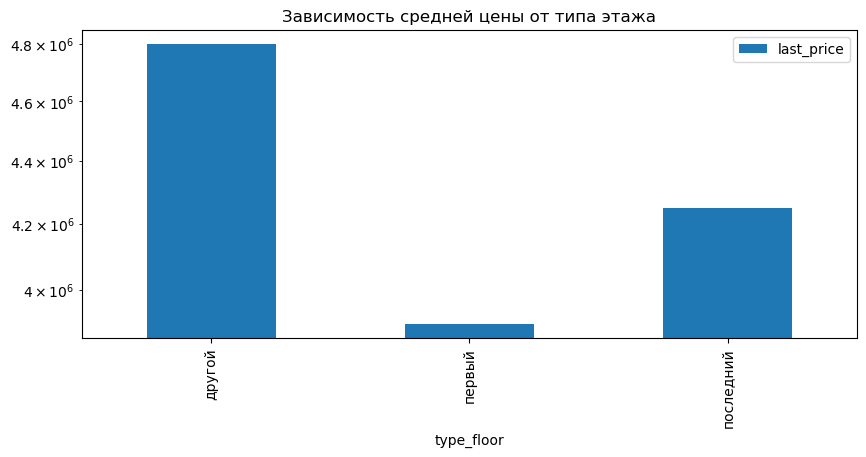

In [74]:
data.pivot_table(index='type_floor', values='last_price', aggfunc=('median'))\
.plot(style='-',title='взаимосвязь типа квартиры с ценой', figsize=(10,4), kind='bar', logy=True)

На основании диаграммы можно сделать вывод что на первом этажи цена намного меньше чем на остальные. На последних этажах так же меньше цена по сравнению с общими.

<AxesSubplot:title={'center':'взаимосвязь кол-во комнат с ценой'}, xlabel='rooms'>

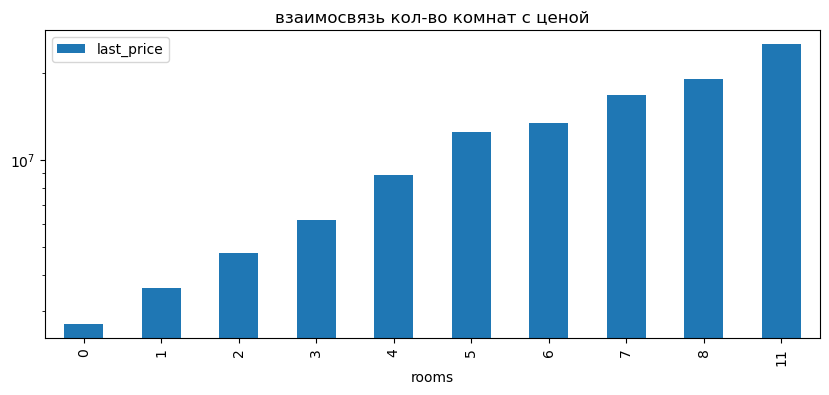

In [75]:
data.pivot_table(index='rooms', values='last_price', aggfunc=('median'))\
.plot(style='-',title='взаимосвязь кол-во комнат с ценой', figsize=(10,4), kind='bar', logy=True)

Так же есть взаимосвязь с кол-ом комнат чем больше комнет тем выше цена.

0.7335254556358821


<AxesSubplot:title={'center':'взаимосвязь общей площади с ценой'}, xlabel='total_area', ylabel='last_price'>

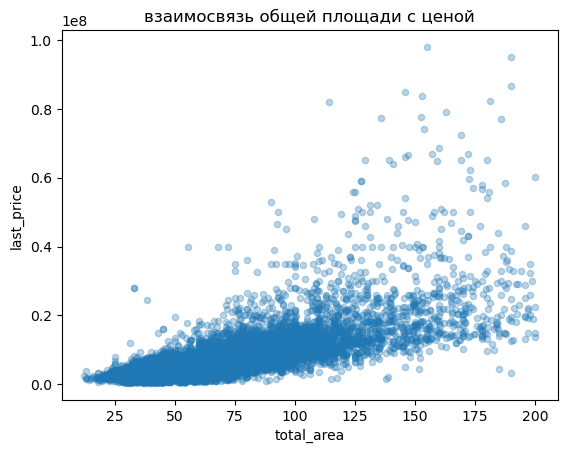

In [56]:
print(data['total_area'].corr(data['last_price']))
data.plot(x='total_area', y='last_price', kind='scatter',title='взаимосвязь общей площади с ценой', alpha=0.3)

На диаграмме рассеяния,можно увидеть среднюю корреляции Пирсона - чем больше общей площади тем больше цена.

0.5834074596405042


<AxesSubplot:title={'center':'взаимосвязь площади кухни с ценой'}, xlabel='kitchen_area', ylabel='last_price'>

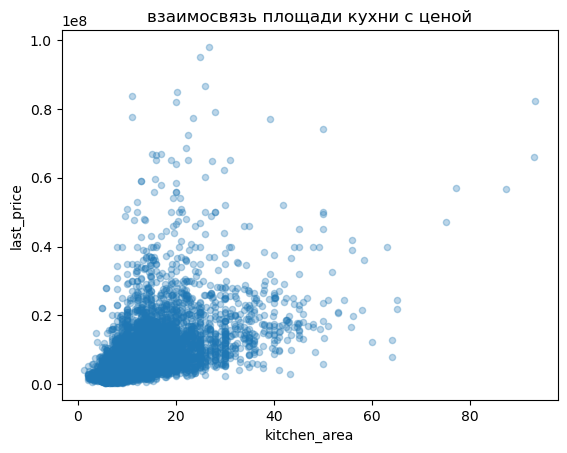

In [57]:
print(data['kitchen_area'].corr(data['last_price']))
data.plot(x='kitchen_area', y='last_price', kind='scatter',title='взаимосвязь площади кухни с ценой', alpha=0.3)

По данным графика и корреляции - взаимосвязь площади кухни с ценой, имеет слабую зависимость.

0.626770738518624


<AxesSubplot:title={'center':'взаимосвязь жилой площади с ценой'}, xlabel='жилая площадь', ylabel='цена'>

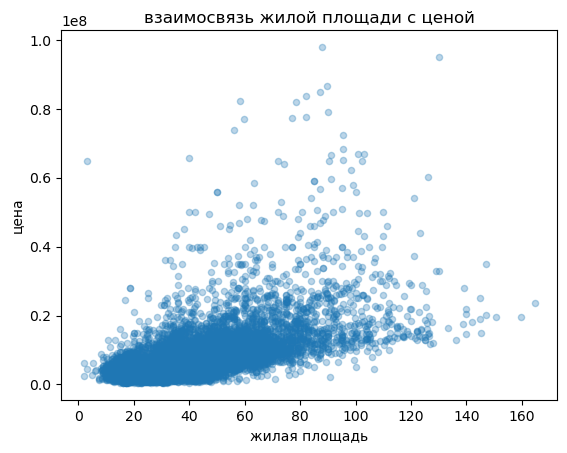

In [58]:
print(data['living_area'].corr(data['last_price']))
data.plot(x='living_area', y='last_price', kind='scatter',\
title='взаимосвязь жилой площади с ценой', alpha=0.3,xlabel = 'жилая площадь', ylabel = 'цена')

По данным графика и корреляции - взаимосвязь жилой площади с ценой имеет слабую зависимость.

Вывод 4.3: наибольшую взаимосвязь с ценой - имеет жилая площадь, слабую взаимосвязь  имеют столбцы с жилой площадью и площадью кухни.  Еще меньшую взаимосвязь имеет кол-во комнат. День недели, месяц и год публикации никак не влияют на цену квартиры. При этом на если квартира на последних или первых этажах, значит цена будет меньше.
________________

# 4.4 Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [59]:
data['data_one_mete'] = data['last_price']/data['total_area']
round(data.pivot_table(index='locality_name', values='data_one_mete', aggfunc=['count', 'mean']) \
.sort_values(('count', 'data_one_mete'),ascending=False).head(10).sort_values(('mean', 'data_one_mete'), ascending=False),0)

,count,mean
,data_one_mete,data_one_mete
locality_name,,
санкт-петербург,15356,113029.0
пушкин,362,102769.0
деревня кудрово,469,95262.0
поселок парголово,326,90332.0
поселок мурино,584,86018.0
поселок шушары,439,78551.0
колпино,337,75333.0
гатчина,305,68811.0


В городе Санкт-Петербурге и в городе Пушкин наибольшая цена за квадратный метр. Наименьшая цена в городе выборг.
_____________________________

# 4.5 Выделите квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='city_centers_nearest_km'>

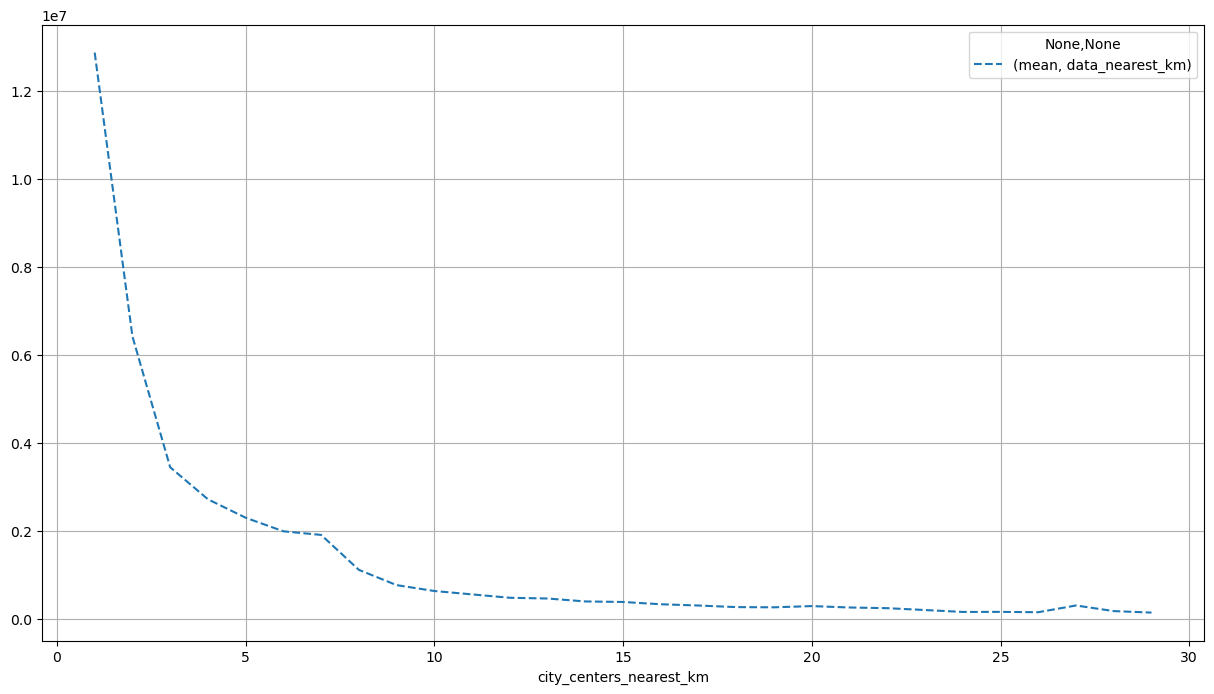

In [60]:
data['data_nearest_km'] = data['last_price']/data['city_centers_nearest_km']
data.loc[data['locality_name'] == 'санкт-петербург']\
.pivot_table(index='city_centers_nearest_km', values='data_nearest_km', aggfunc=['mean'])\
.plot(style='--',figsize=(15,8), grid=True)

Согласно полученному графику имеется прямая зависимость между стоимостью и растоянием до центра

### Вывод раздел 4: Больше всего на цену влияет близость центру Санкт-Петербурга и общая площадь квартиры куда боллее меньше влияет жилая площадь и площадь кухнии совсем немного кол-во комнат. Дата публикации никак не влияет на цену квартиры. Так же стоит расчитывать что квартира в среднем продастся от 45 до 230 дней.

# 5. Общий вывод

Мной, данные приведены в порядок, добавлены вспомогательные столбцы, выведены общие выводы.

Исходя из полученных данных, можно сделать следующие выводы. 

- В данном датасете на цену квартиры наиболее влияет удаленность от центра Санкт-Петербурга что подтверждают графики и выведенная кореляция, так-же наибольшая цена за квадратный метр именно в Санкт-Петербурге. Это объясняется тем что инфрастутура в центре крупного города всегда лучше налажена чем и привлекает покупателей.
- Следующим, меннее важным параметром выступает общая площадь квартиры, у нее есть небольшая кореляция соответвенно чем больше площадь квартиры тем больше ее цена.
- Слабо влияющими факторами, образования цен на квартиру, выступают жилая площадь и площадь кухни. 
- Есть прямая кореляция между общей ценой и кол-вом комнат. 
- Квартиры на первых и последних этажах имеют низкую цену в сравнении с другими типами квартир.
- Продавцы в выходные публикуют квартиры с ценами меньше чем в будни. Перед и после новгого года публикуются квартиры с большей ценой. В мае в основном публикуются квартиры с меньшей ценой.
- Хотя продавцы меньше публикуют квартиры в выходные, на время новогодних праздников (декабрь, январь) а так же в период отпусков (с мая по август).
- Согласно данным данного датасета цены на квартиры со временем увеличиваются.
- В среднем квартиры продаются за 179 дней или за период с 45 по 230 дней.
- Больше всего 5 и 9 этажных домов, чуть менее 16 этажных. Выше 25 этажных домов практически нету.
- чаше всего встречаются квартиры  с площадью кухни 9 кв. м., c жилой площадью 33 кв. м., с общей площадью 51 кв.м. со стоимостью 3,5 млн рублей с 1,2 и 3 комнатами с высотой потолка 250 см. не на первом и не на последнем этаже и с удаленость от парка в 500 м. ближе к окраине города 12 и 15 км.

Стоит обратить внимание что срез данных сделан с 2014-11-27 по 2019-05-03.


В данном иследовании не затронуты столбцы balcony, is_apartment, studio, open_plan, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest
Можно выделить отдельные столбцы с другими типами квартир в колонках is_apartment, studio, open_plan, хотя там очень мало значения. Затем проанализировать взаимосвязь с ценой на эти квартиры.
Так же проанализировать цены взаимосвяси цены с балконами и высотой полоков в том числе и с близостью (наличием) парков и водоемов. А в итоге можно проанализировать взаимосвязь отдельных столбцов например количество комнат с этажностью дома или зависимость высоты зданий от удаленности от центра области.


Можно сказать что наиболее дорогая недвижимость сосредоточена в центре Санкт-Петербурга с большой общей площадью с большой кухней и жилой зоной и не на первом или последнем этаже, с большим кол-вом квартир.
Наиболее дешевая недвижимость - это квартира на окраине Ленинградской области с маленьким метражом квартиры,кухней и жилой зоной а так же на последнем или на первом этаже.

----------------